In [7]:
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt

In [8]:
from gseapy.plot import barplot, dotplot

# Tumor vs Normal

In [14]:
exclude_2cls=[
'CYP4A22',
'CYP3A7',
'CYP21A2',
'CYP26C1',
'CYP27C1',
'ACOT1',
'ACOT2',
'FADS1',
'FADS6',
'ACAD11',
'PRXL2B',
'LTA4H',
'PLA2G2C',
'PLA2G4B',
'PLA2G4E',
'PLA2G10',
'FFAR4'
]

backgoround_2cls= PUFA[~PUFA.Gene.isin(exclude_2cls)].Gene

In [15]:
genes_up_in_tumor = pd.read_csv('Adj_Tum/UP_in_Tumor_vs_Adj.tsv', sep='\t', index_col=0)

In [16]:
enr2 = gp.enrichr(gene_list=genes_up_in_tumor.Gene,
                 # or gene_list=glist
                 description='test_name',
                 gene_sets=libraries,
                 background=backgoround_2cls, # or the number of genes, e.g 20000
#                 outdir='Enrichr_Tumor/',
                 cutoff=0.01, # only used for testing.
                 format='png',
                 verbose=False)

2022-09-14 21:31:00,888 Warning: No enrich terms using library Panther_2016 when cutoff = 0.01


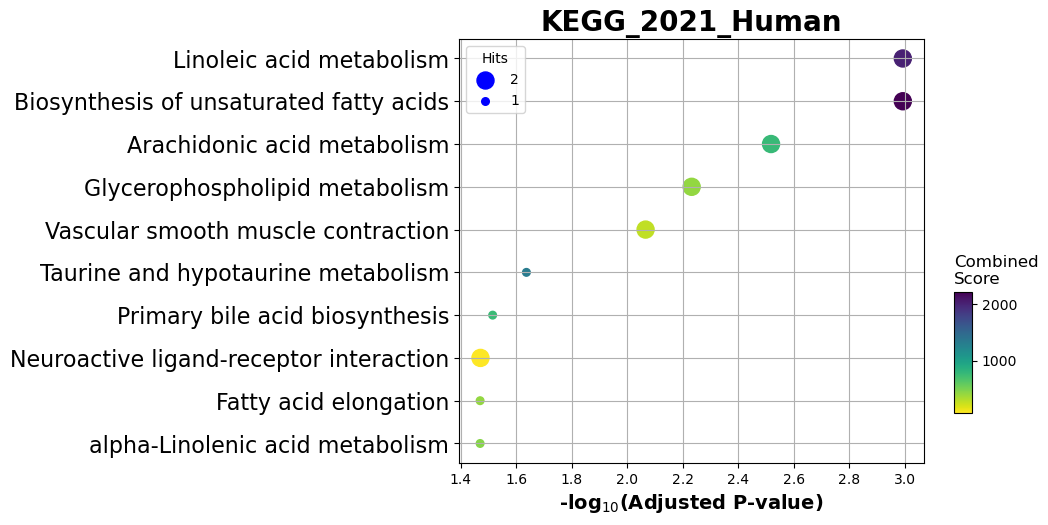

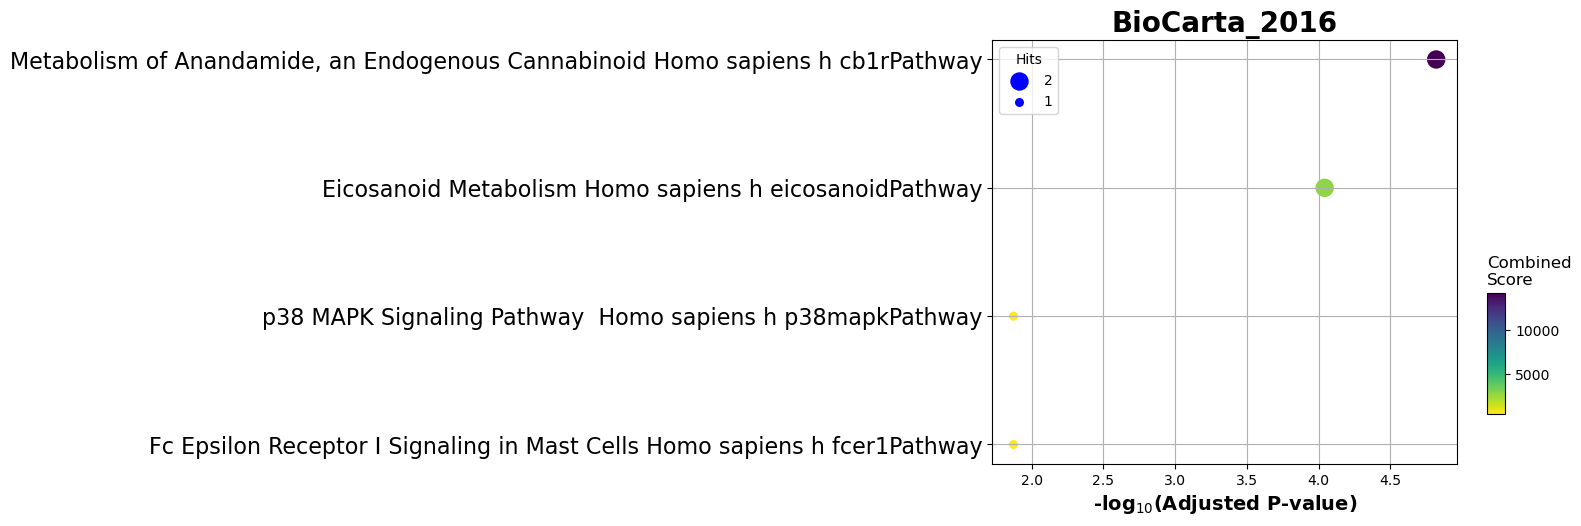

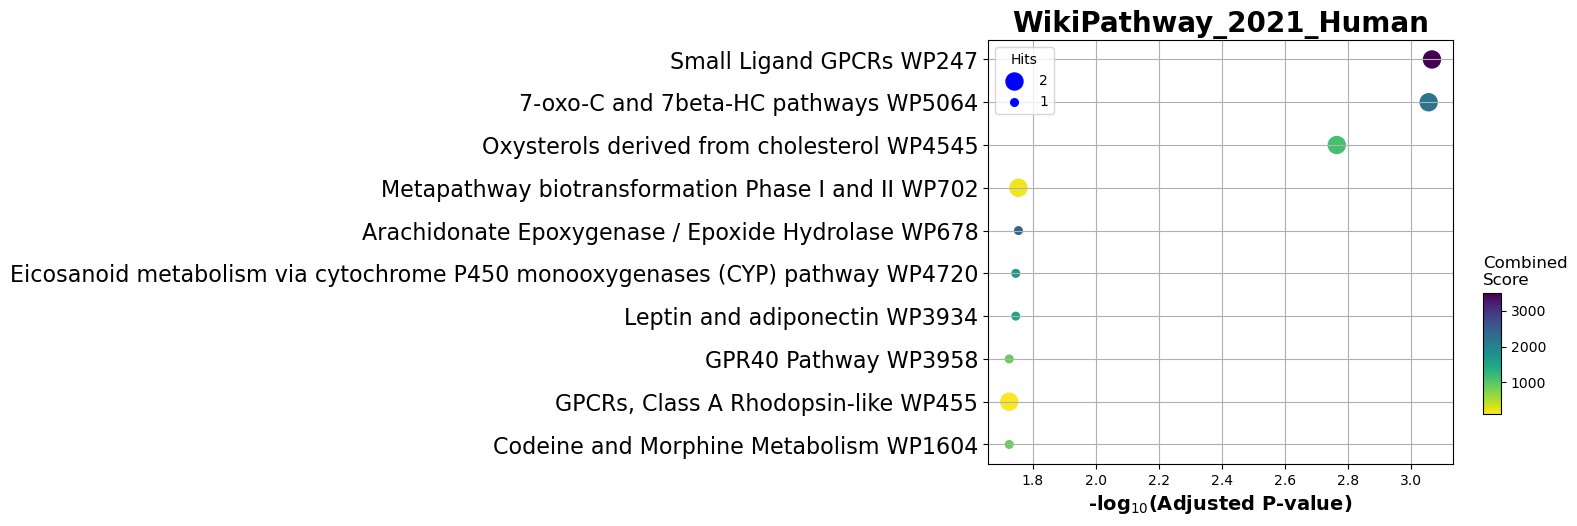

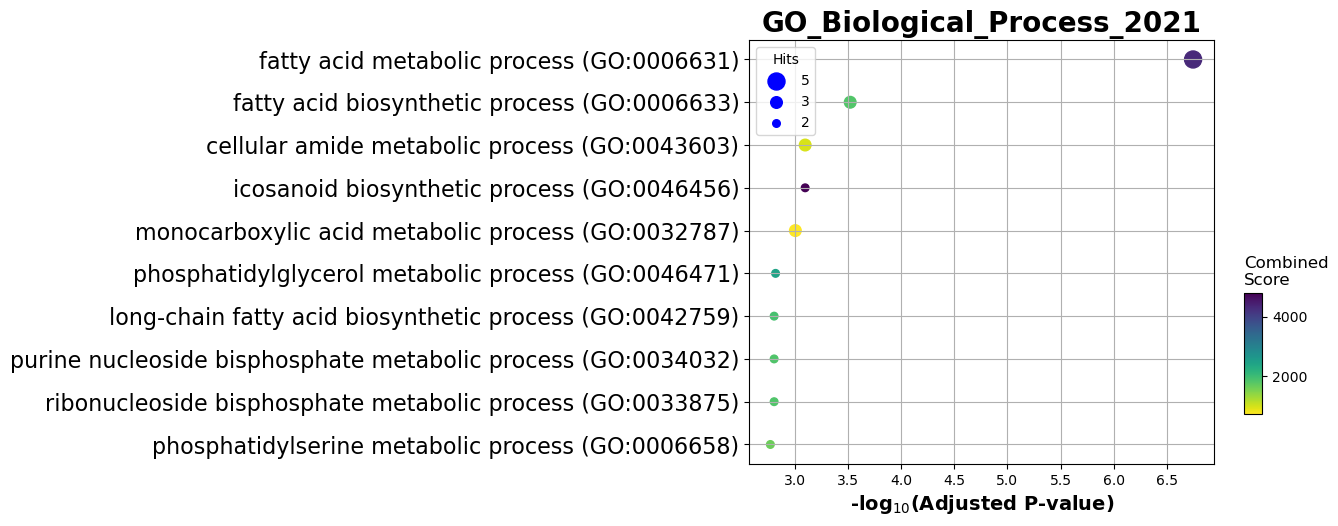

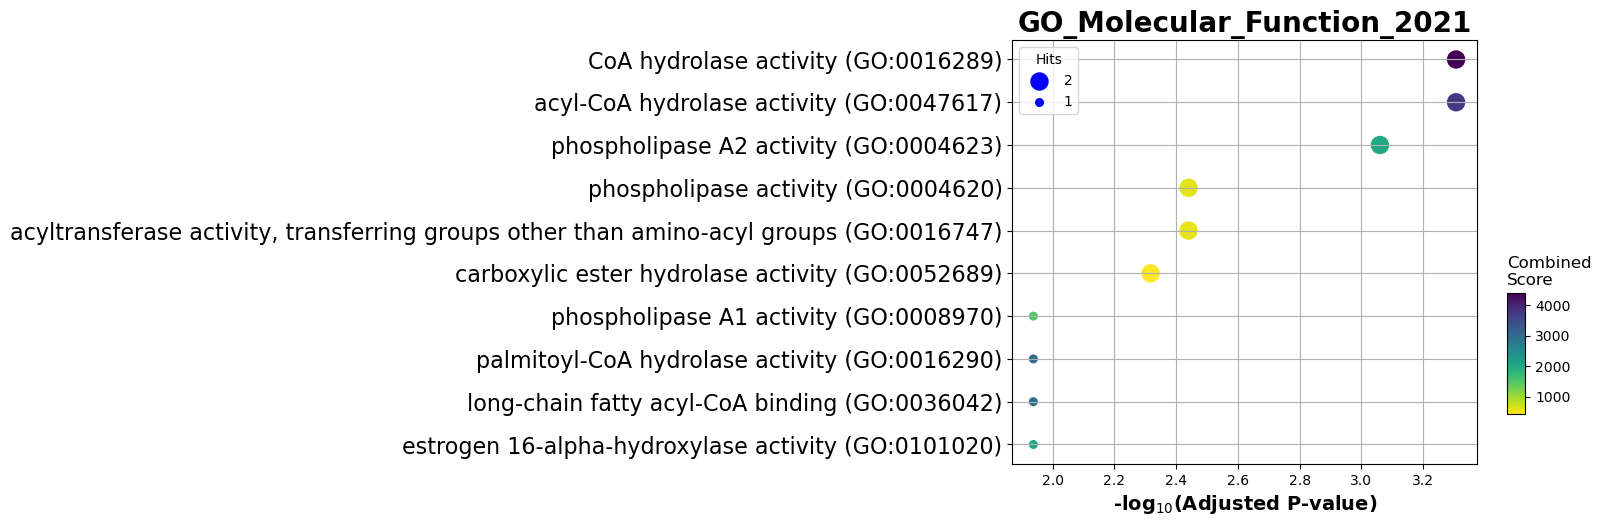

In [17]:
for geneset in libraries:
    if not enr2.results[enr2.results.Gene_set==geneset].empty:
        ax = dotplot(enr2.results[enr2.results.Gene_set==geneset], title=geneset, cmap='viridis_r')
        #ax.grid(False)
#         plt.savefig(f"Adj_Tum_BRCA/Enrichr_Adj/UPreg_Adj_{geneset}.png", format='png')
#         plt.close()
        plt.show()

In [19]:
genes_up_in_adj = pd.read_csv('Adj_Tum/UP_in_Adj_vs_Tumor.tsv', sep='\t', index_col=0)

In [20]:
enr2 = gp.enrichr(gene_list=genes_up_in_adj.Gene,
                 # or gene_list=glist
                 description='test_name',
                 gene_sets=libraries,
                 background=backgoround_2cls, # or the number of genes, e.g 20000
                 outdir='Enrichr_Adj/',
                 cutoff=0.01, # only used for testing.
                 format='png',
                 verbose=False)

2022-09-14 21:32:13,589 Warning: No enrich terms using library Panther_2016 when cutoff = 0.01


/home/mashk/miniconda3/envs/igdiscover/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


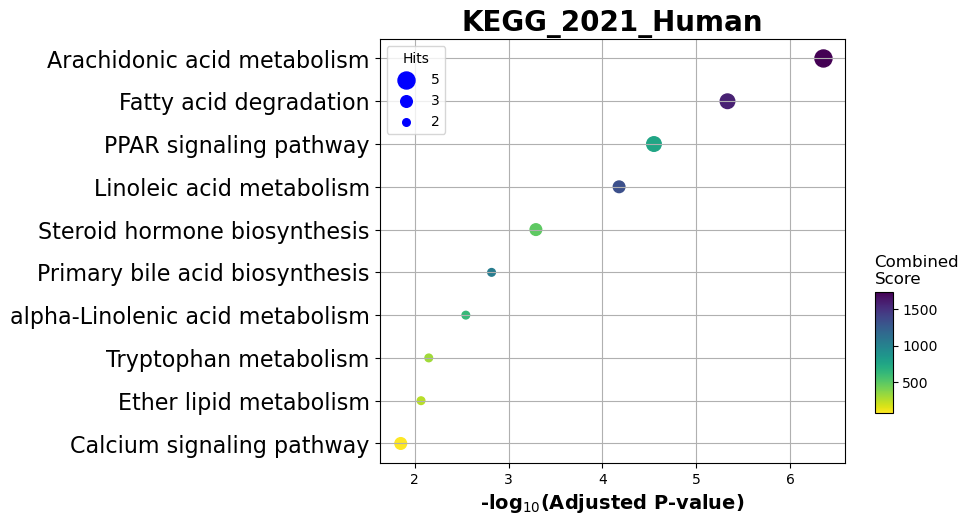

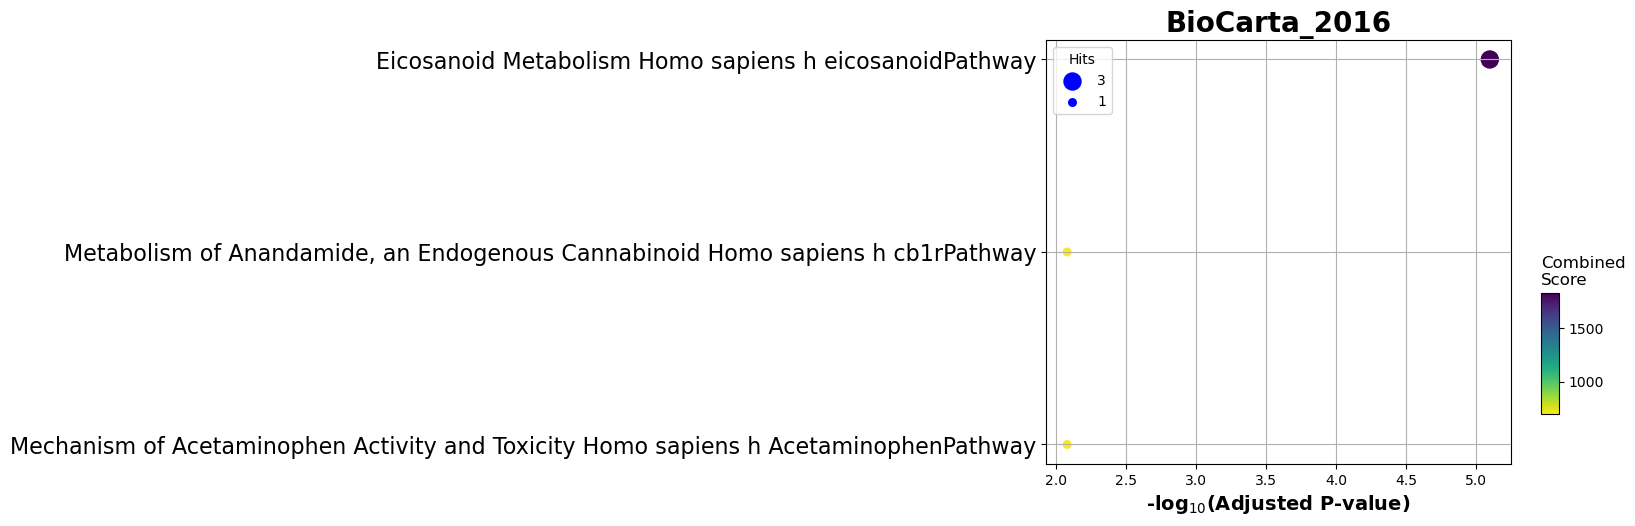

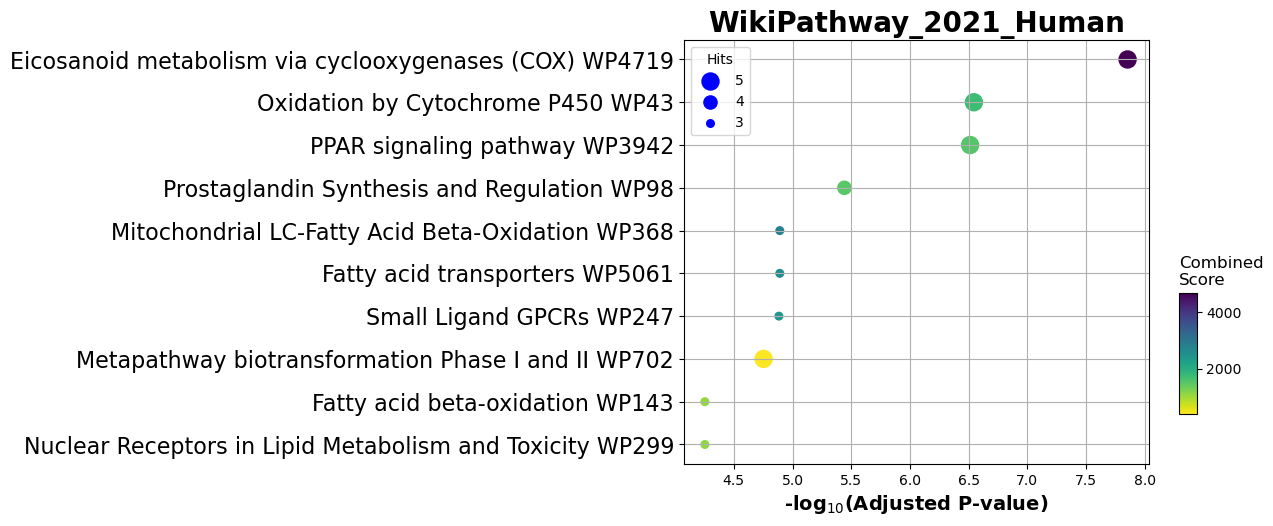

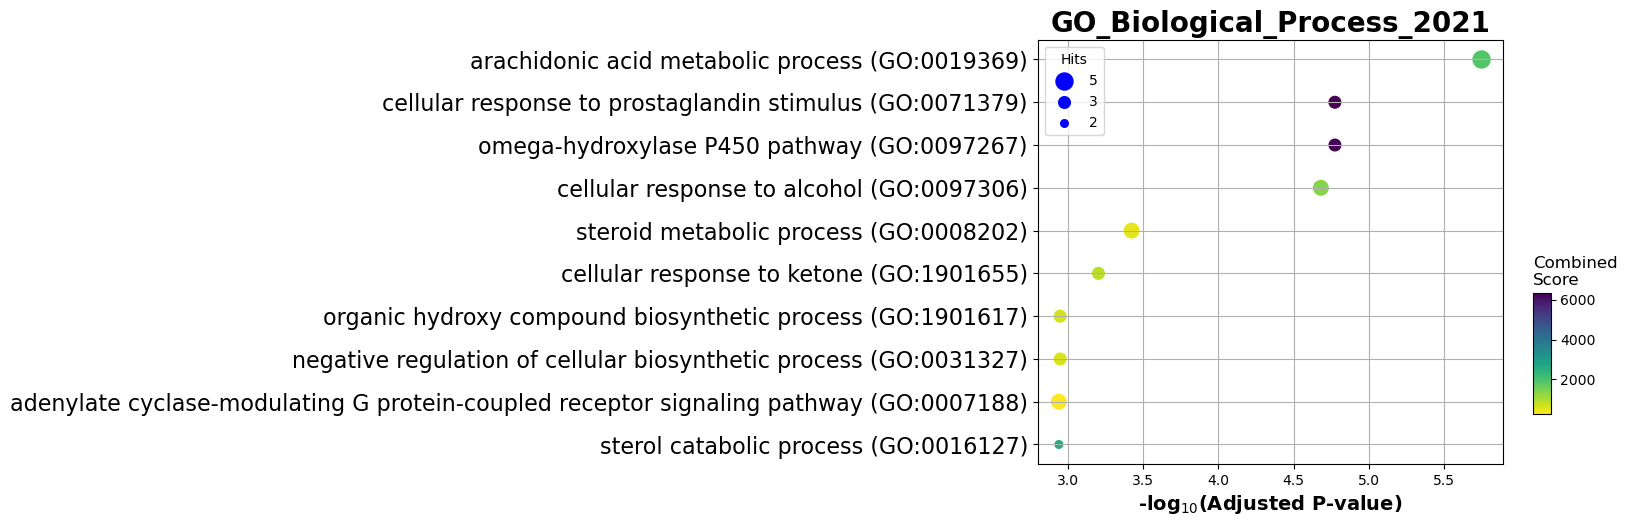

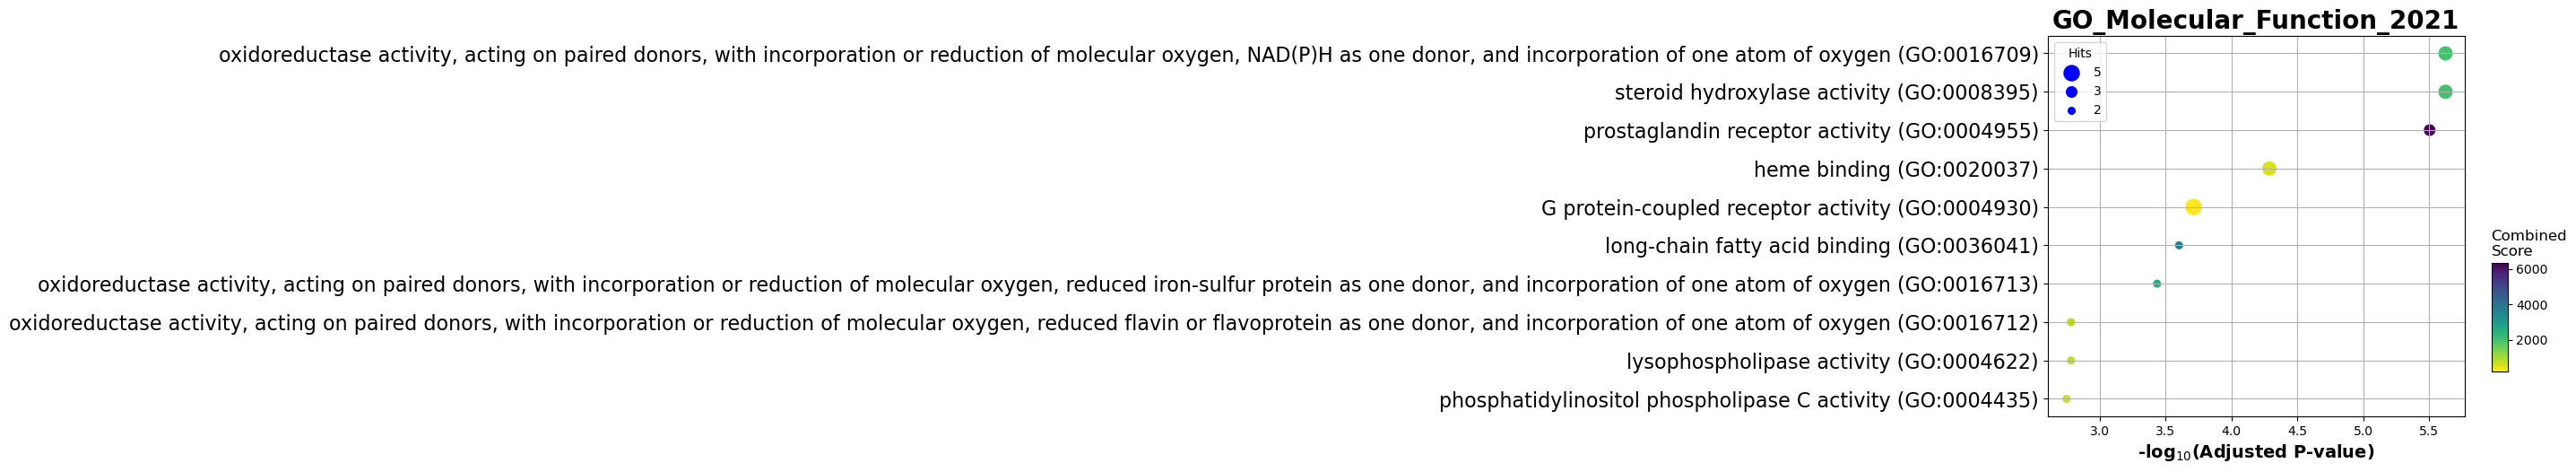

In [21]:
for geneset in libraries:
    if not enr2.results[enr2.results.Gene_set==geneset].empty:
        ax = dotplot(enr2.results[enr2.results.Gene_set==geneset], title=geneset, cmap='viridis_r')
        plt.show()

# Molecular Subtypes

In [9]:
exlude_4cls = ["CYP2S1","CYP4A22" ,
"CYP4F22",
"CYP4V2",
"CYP4X1",
'CYP4Z1',
'CYP3A7',
'CYP21A2',
'CYP26C1',
'CYP27C1' ,
'FAR1',
'ACOT1',
'ACOT2',
'ACOT4',
'ACOT6',
'ACOT12',
'FADS1',
'FADS6',
'ACAD9',
'ACAD11',
'PRXL2B',
'PTGR1',
'LTA4H',
'EPHX4',
'FAAH2',
'PLA2G2C',
'PLA2G4B',
'PLA2G4D',
'PLA2G4E',
'PLA2G4F',
'PLA2G10',
'PLA2G12B',
'PLB1',
'PLCZ1',
'PLCD3',
'PLCD4',
'PLD4',
'PLD5',
'PLD6',
'GPR55',
'LGR6',
'FFAR1',
'FFAR4',
'OXER1',
'OXGR1',
'THEM4',
'THEM5']

PUFA = pd.read_csv('Pufa_cascade.tsv', sep='\t', index_col=0)
backgoround_4cls= PUFA[~PUFA.Gene.isin(exlude_4cls)].Gene

In [10]:
LumA = ['ELOVL5', 'ACAA1', 'PLD2', 'ACAD8', 'HPGDS', 'PLCL1', 'CYP4F11',
       'PTGER3', 'CYP4F8', 'ELOVL2', 'EPHX2', 'LPCAT3', 'FABP4', 'LTC4S']

LumB = ['PTGES3', 'ADIPOR1', 'MBOAT7', 'ACOT8', 'CYP2B6', 'FAAH']

Her2 = ['FASN', 'MGLL', 'FABP6', 'ALOX15B', 'FADS2']

Basal = ['HSD17B12', 'AKR1B1', 'PLAA', 'CYP39A1', 'PLD1', 'PLA2G2D', 'PLA2G4A',
       'FPR2', 'PLCG2', 'ACOT9', 'PLCH1', 'CYP7B1', 'FABP5', 'PLA2G7', 'CBR1',
       'FABP7']

In [11]:
libraries = ['KEGG_2021_Human', 
                            'BioCarta_2016', 
                            'WikiPathway_2021_Human',
                            'Panther_2016',
                            'GO_Biological_Process_2021', 
                            'GO_Molecular_Function_2021']

In [12]:
enr_4cls = gp.enrichr(gene_list=Basal, #select subtype gene list
#                 description='test_name',
                 gene_sets=libraries,
                 background=backgoround_4cls, # or the number of genes, e.g 20000
                 outdir='Basal/',
                 cutoff=0.001, # only used for testing.
                 format='png',
                 verbose=False)

2022-09-14 21:29:21,330 Warning: No enrich terms using library BioCarta_2016 when cutoff = 0.001
2022-09-14 21:29:26,665 Warning: No enrich terms using library Panther_2016 when cutoff = 0.001


/home/mashk/miniconda3/envs/igdiscover/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


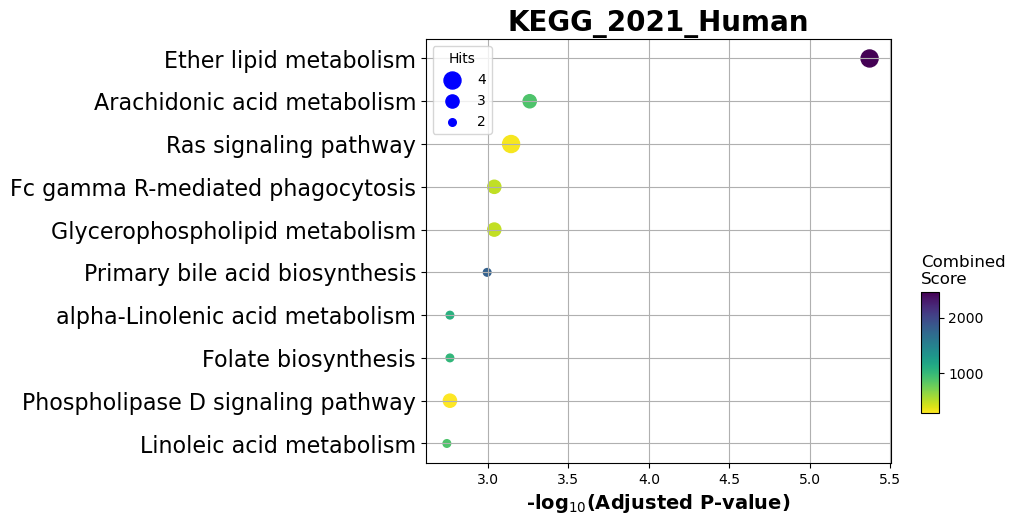

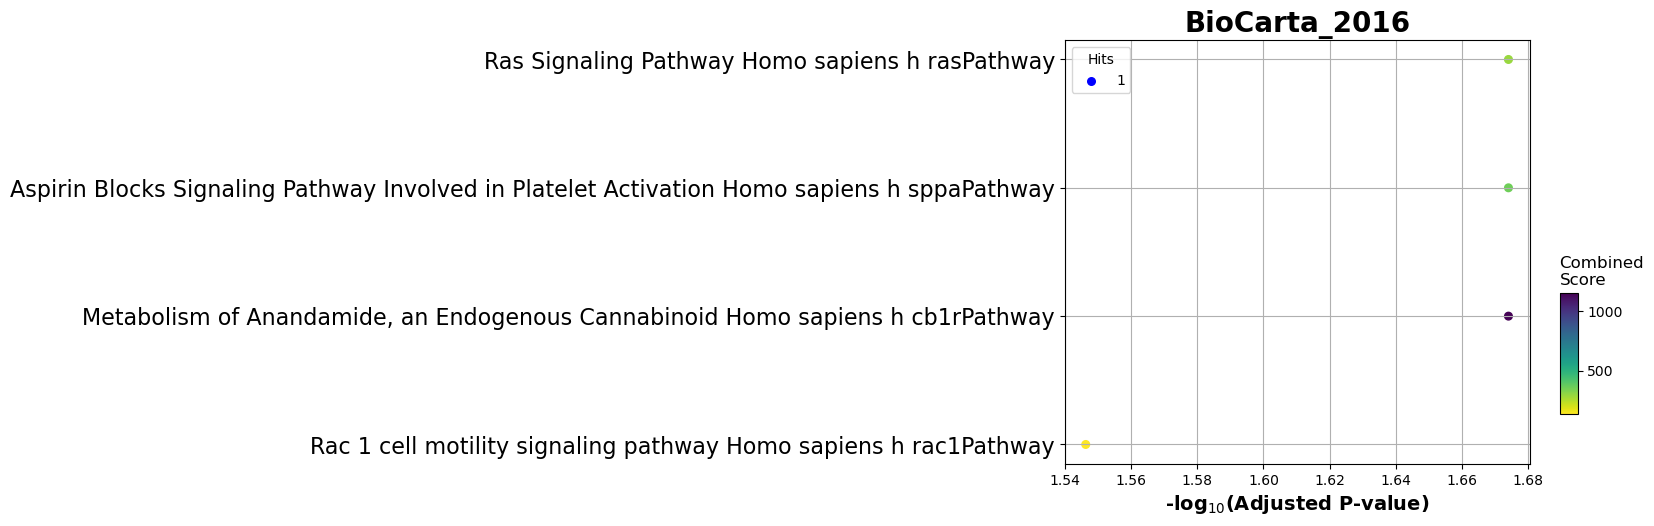

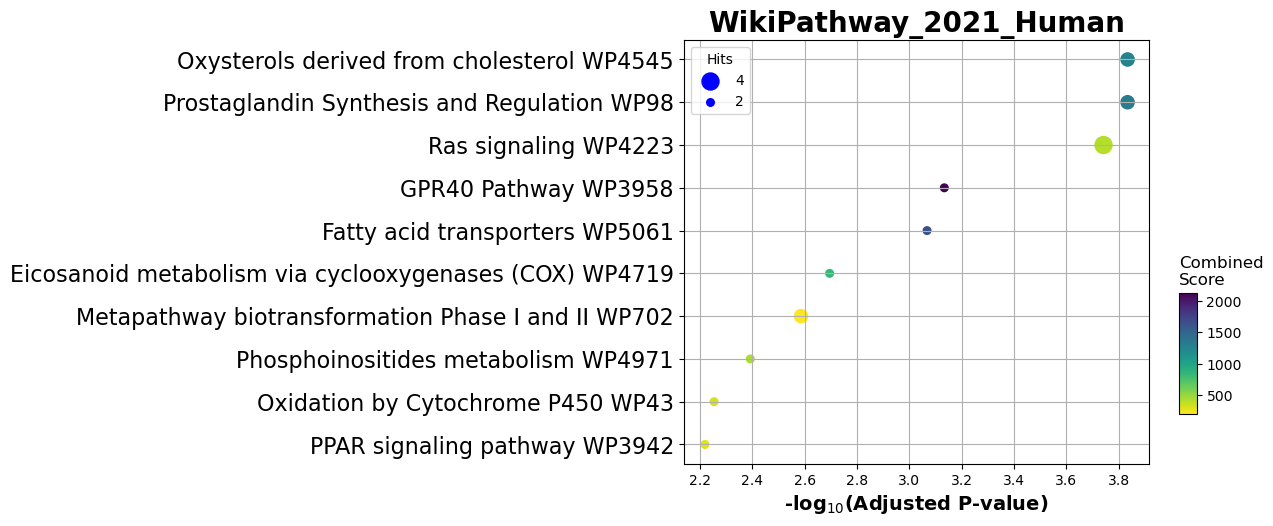

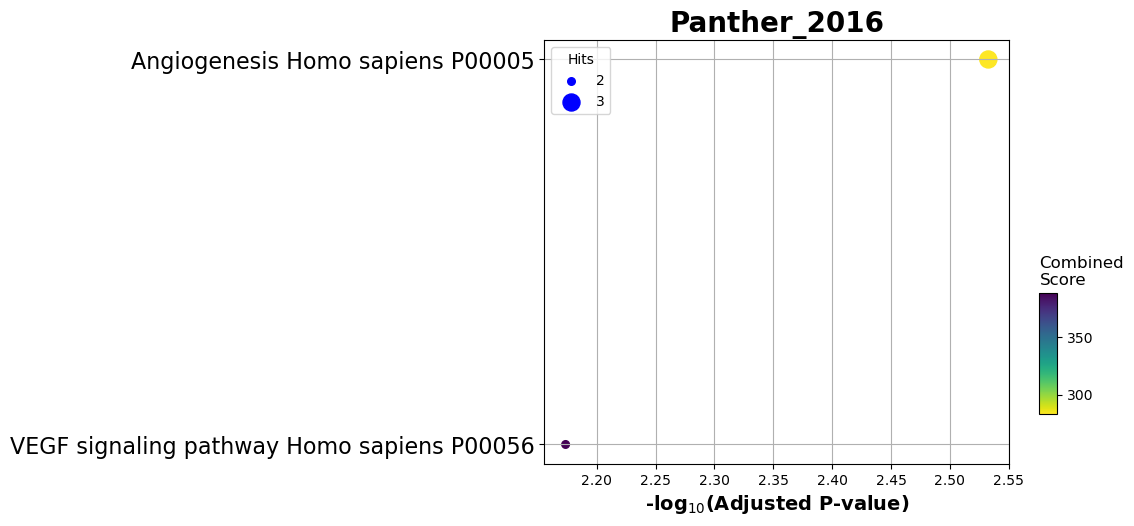

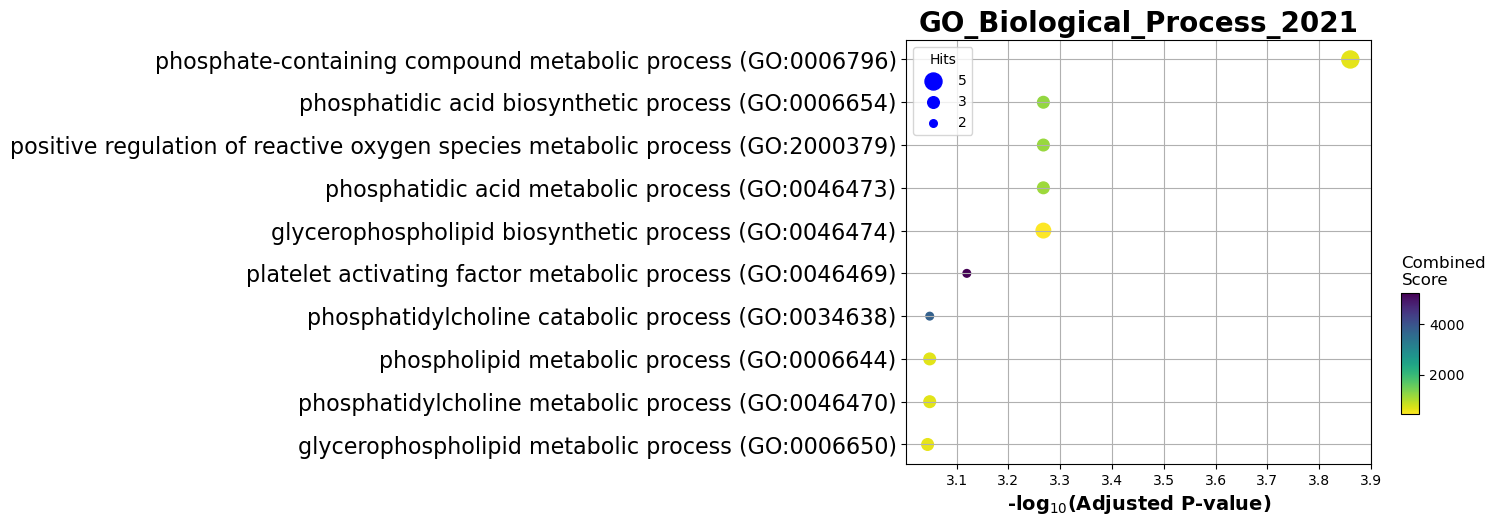

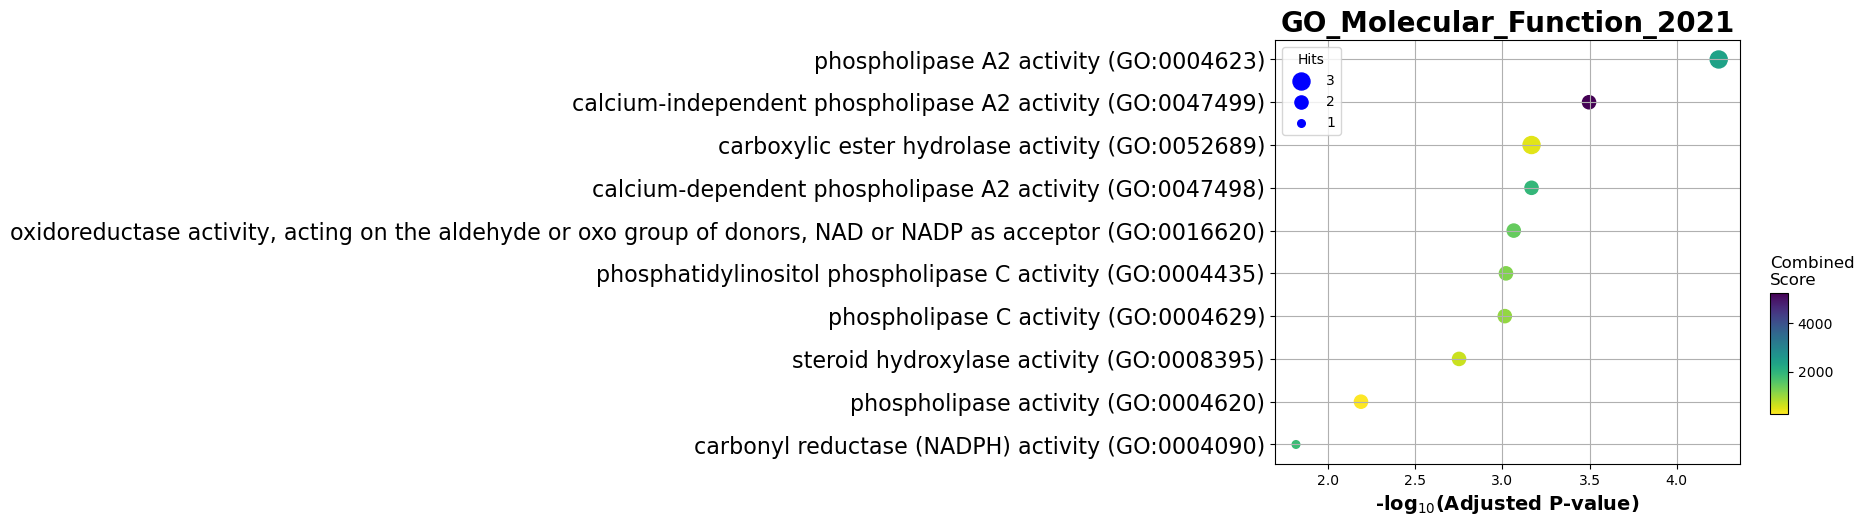

In [13]:
#Basal
for geneset in libraries:
    if not enr_4cls.results[enr_4cls.results.Gene_set==geneset].empty:
        ax = dotplot(enr_4cls.results[enr_4cls.results.Gene_set==geneset], title=geneset, cmap='viridis_r')
        #ax.grid(False)
#         plt.savefig(f"test/test2/Basal/Basal_{geneset}.png", format='png')
#         plt.close()
        plt.show()

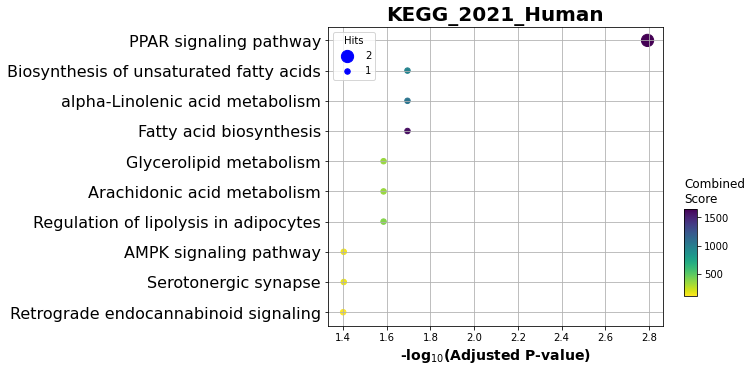

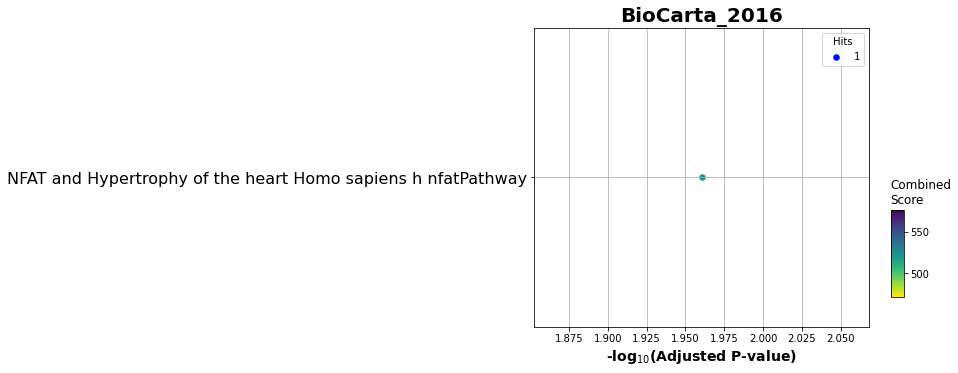

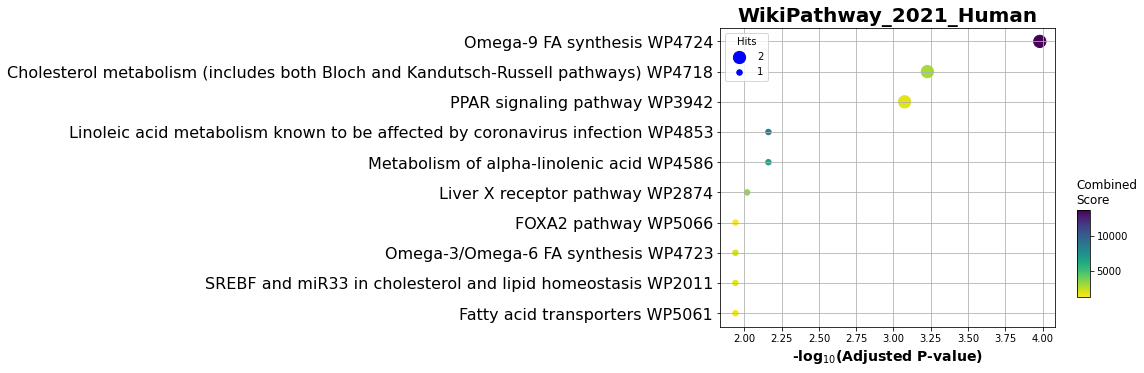

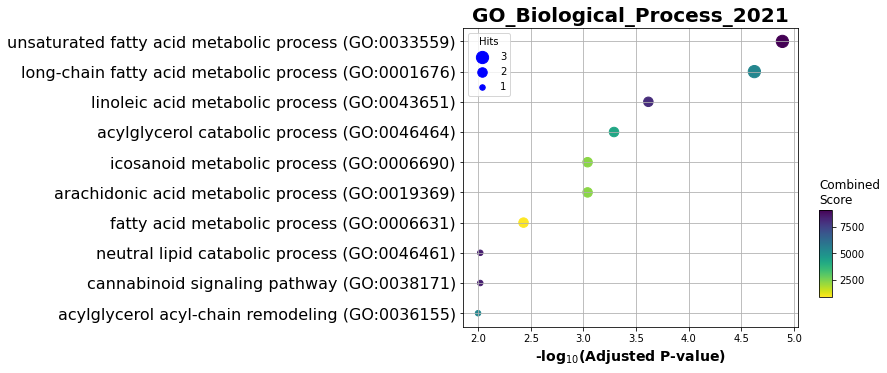

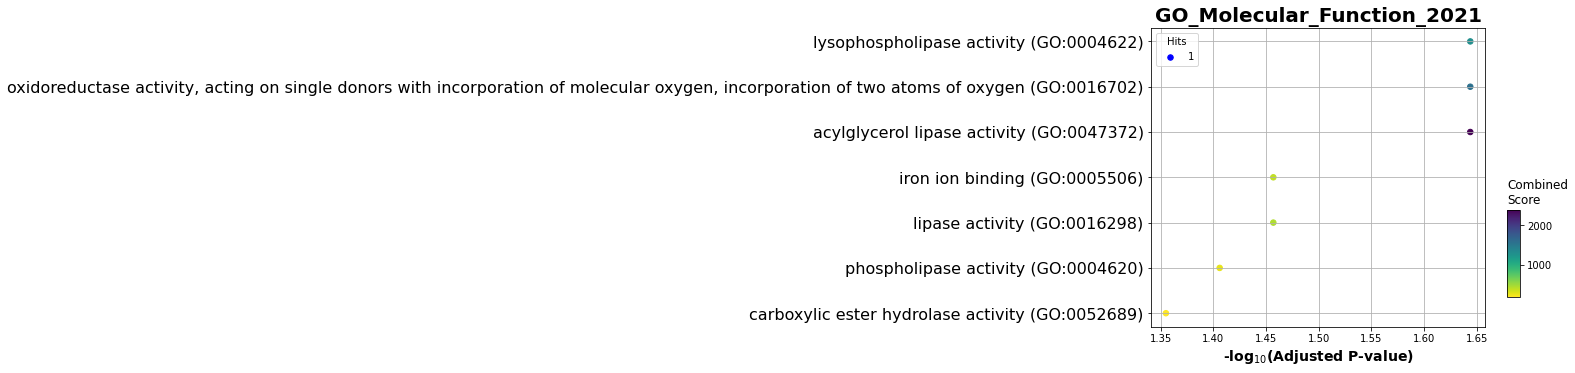

In [11]:
#Her2
for geneset in libraries:
    if not enr_4cls.results[enr_4cls.results.Gene_set==geneset].empty:
        ax = dotplot(enr_4cls.results[enr_4cls.results.Gene_set==geneset], title=geneset, cmap='viridis_r')
        #ax.grid(False)
#         plt.savefig(f"test/test2/Her2/Her2_{geneset}.png", format='png')
#         plt.close()
        plt.show()

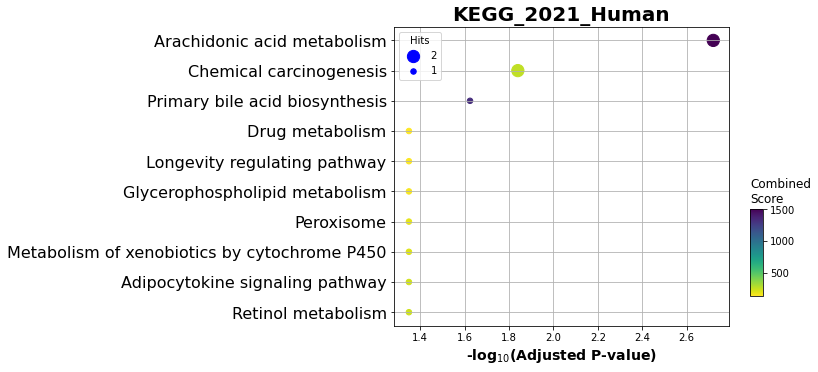

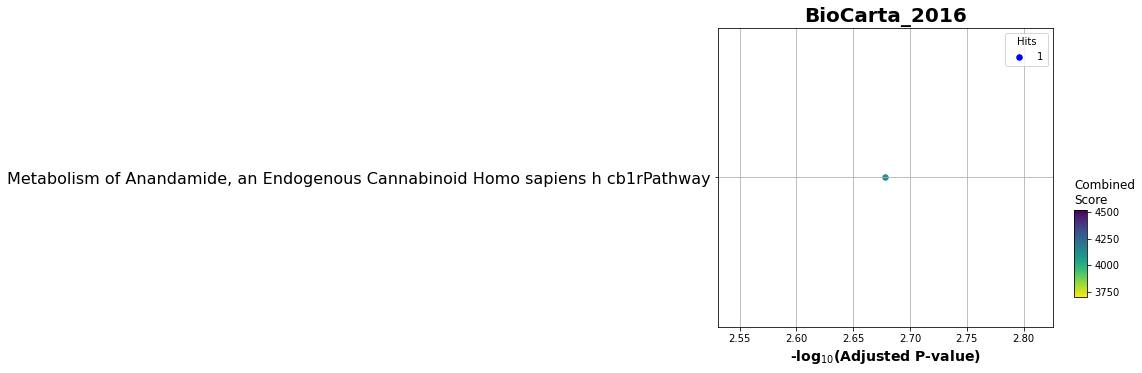

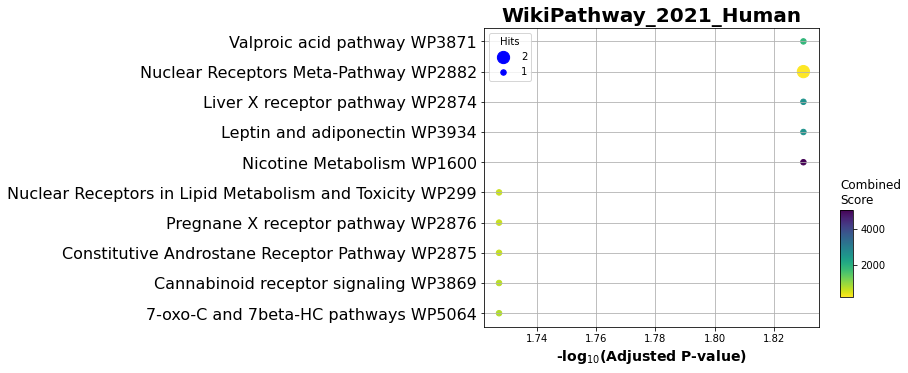

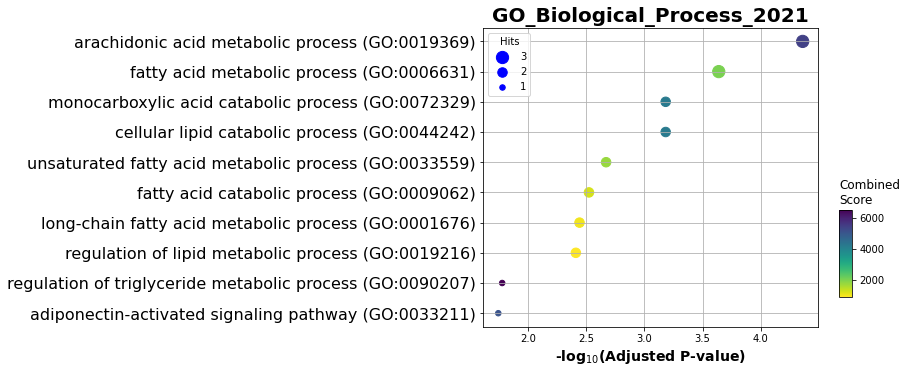

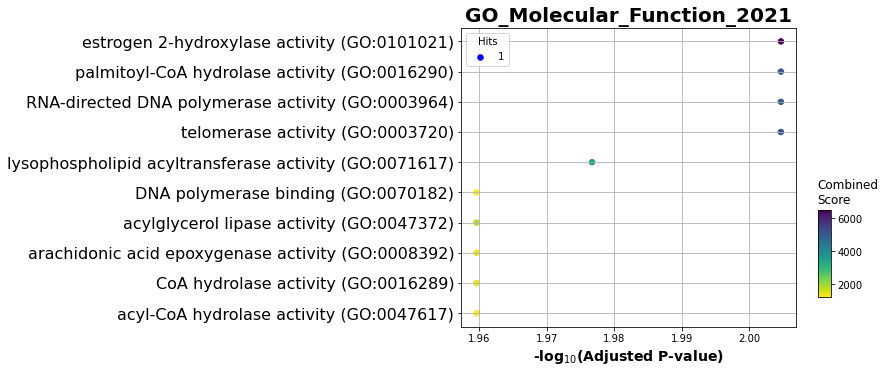

In [13]:
#LumB
for geneset in libraries:
    if not enr_4cls.results[enr_4cls.results.Gene_set==geneset].empty:
        ax = dotplot(enr_4cls.results[enr_4cls.results.Gene_set==geneset], title=geneset, cmap='viridis_r')
        #ax.grid(False)
#         plt.savefig(f"test/test2/LumB/LumB_{geneset}.png", format='png')
#         plt.close()
        plt.show()

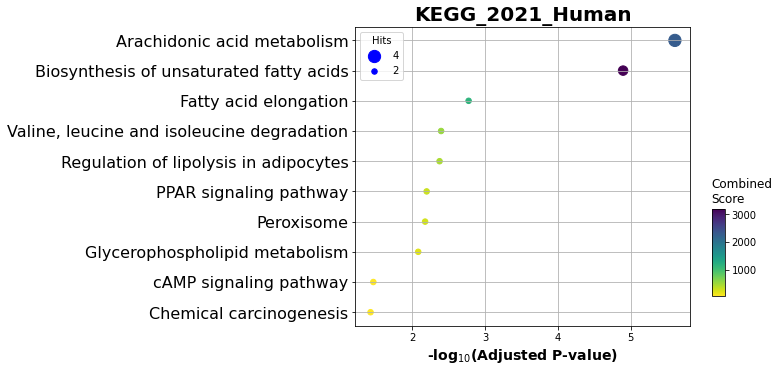

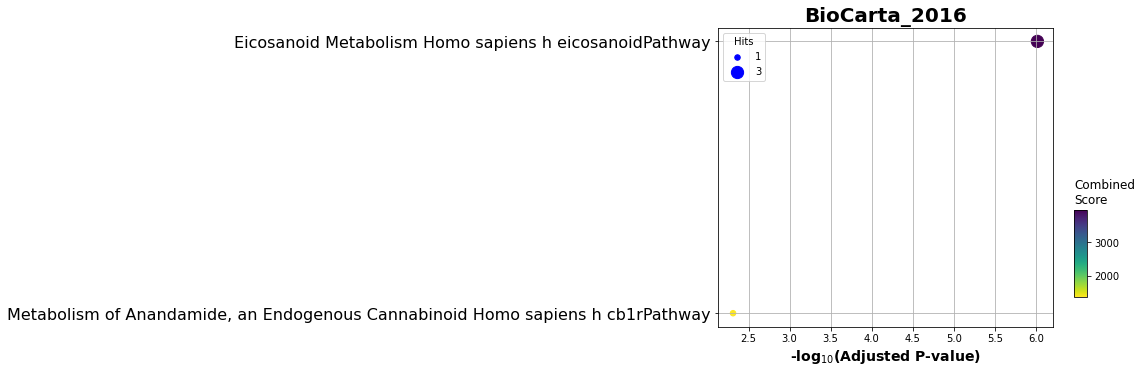

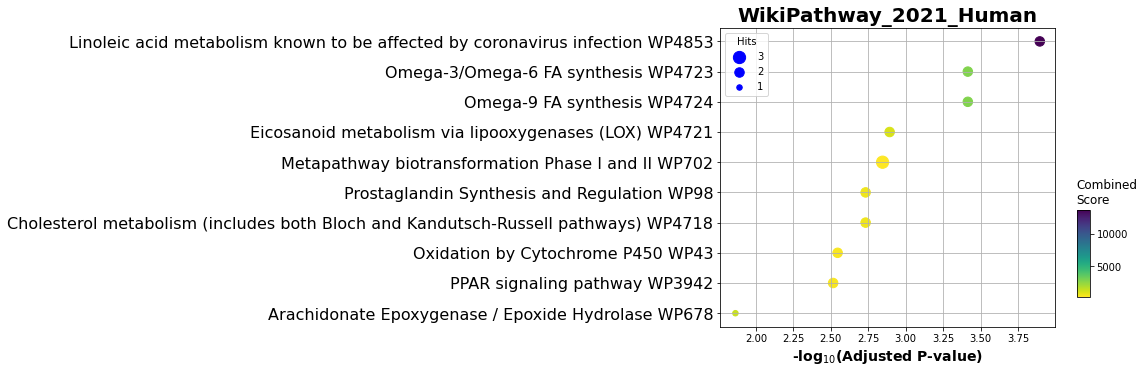

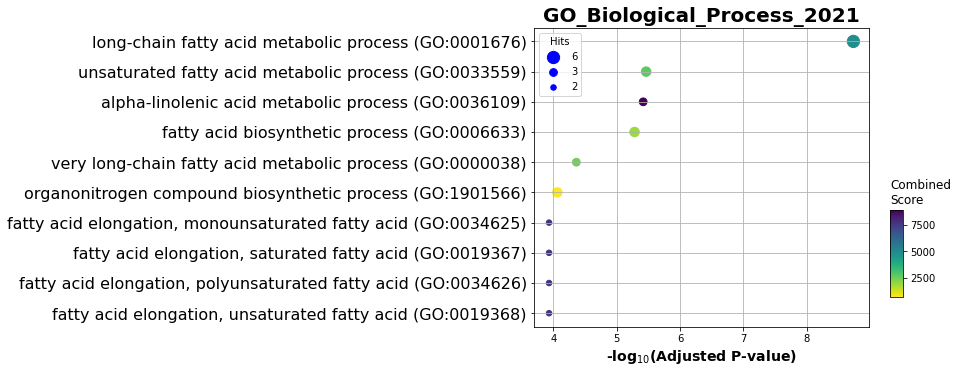

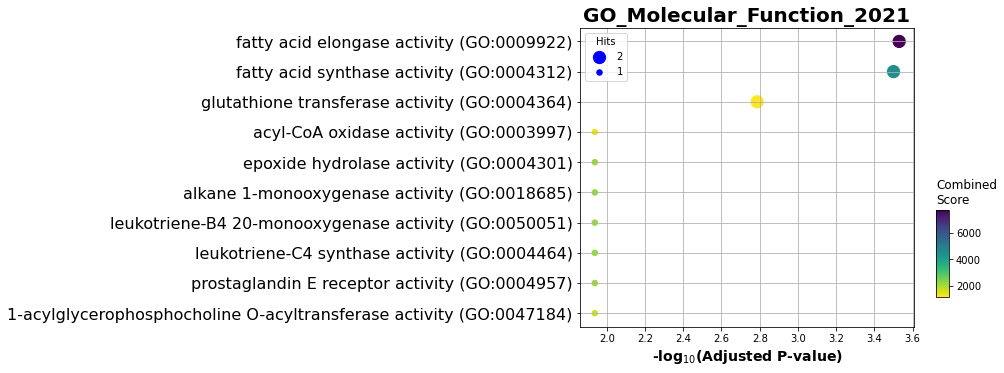

In [15]:
#LumA
for geneset in libraries:
    if not enr_4cls.results[enr_4cls.results.Gene_set==geneset].empty:
        ax = dotplot(enr_4cls.results[enr_4cls.results.Gene_set==geneset], title=geneset, cmap='viridis_r')
        #ax.grid(False)
#         plt.savefig(f"test/test2/LumA/LumA_{geneset}.png", format='png')
#         plt.close()
        plt.show()